### Importando os pacotes

In [29]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = 'browser'
import plotly.graph_objects as go

### Criando meu dataset

In [30]:
monsters = pd.read_csv("DnD5e_Monsters_Stats.csv")
monsters

,Name,Armor Class,Hit Points,Speed,CR,STR,DEX,CON,INT,WIS,CHA,Type,Alignment
0,Aarakocra,12,13,"20 ft., fly 50 ft.",0.25,10,14,10,11,12,11,Medium humanoid (Aarakocra),neutral good
1,Aboleth,17,135,"10 ft., swim 40 ft.",10.00,21,9,15,18,15,18,Large aberration,lawful evil
2,Abominable Yeti,15,137,"40 ft., climb 40 ft.",9.00,24,10,22,9,13,9,Huge monstrosity,chaotic evil
3,Acolyte,10,9,30 ft.,0.25,10,10,10,10,14,11,Medium humanoid (any race),any alignment
4,Adult Black Dragon,19,195,"40 ft., fly 80 ft., swim 40 ft.",14.00,23,14,21,14,13,17,Huge dragon (Chromatic),chaotic evil
...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Young White Dragon,17,133,"40 ft., burrow 20 ft., fly 80 ft., swim 40 ft.",6.00,18,10,18,6,11,12,Large dragon (Chromatic),chaotic evil
424,Yuan-ti Abomination,15,127,40 ft.,7.00,19,16,17,17,15,18,"Large monstrosity (Shapechanger, Yuan-ti)",neutral evil
425,Yuan-ti Malison,12,66,30 ft.,3.00,16,14,13,14,12,16,"Medium monstrosity (Shapechanger, Yuan-ti)",neutral evil
426,Yuan-ti Pureblood,11,40,30 ft.,1.00,11,12,11,13,12,14,Medium humanoid (Yuan-ti),neutral evil


### Checando a descrição das variáveis e informações do dataset

In [31]:
monsters_desc=monsters.describe()
monsters_desc

,Armor Class,Hit Points,CR,STR,DEX,CON,INT,WIS,CHA
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,14.233645,79.168224,4.552278,15.025701,12.808411,15.004673,8.488318,11.735981,10.100467
std,3.155841,91.606197,5.596778,6.388059,3.128882,4.356478,5.519593,2.936154,5.535637
min,5.000000,1.000000,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000
25%,12.000000,19.000000,0.500000,11.000000,10.000000,12.000000,3.000000,10.000000,6.000000
50%,14.000000,51.000000,2.000000,16.000000,13.000000,14.000000,9.000000,12.000000,9.500000
75%,17.000000,110.000000,6.000000,19.000000,15.000000,17.000000,12.000000,13.000000,14.000000
max,25.000000,676.000000,30.000000,30.000000,28.000000,30.000000,25.000000,25.000000,30.000000


In [32]:
monsters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         428 non-null    object 
 1   Armor Class  428 non-null    int64  
 2   Hit Points   428 non-null    int64  
 3   Speed        428 non-null    object 
 4   CR           428 non-null    float64
 5   STR          428 non-null    int64  
 6   DEX          428 non-null    int64  
 7   CON          428 non-null    int64  
 8   INT          428 non-null    int64  
 9   WIS          428 non-null    int64  
 10  CHA          428 non-null    int64  
 11  Type         428 non-null    object 
 12  Alignment    428 non-null    object 
dtypes: float64(1), int64(8), object(4)
memory usage: 43.6+ KB


In [33]:
# Verificando se a coluna "Speed" contém a substring "ft"
contains_ft = monsters["Speed"].str.contains("ft", na=False)

# Extraindo apenas números e convertendo para float
monsters.loc[contains_ft, "ft Speed"] = monsters.loc[contains_ft, "Speed"].str.extract('(\d+)')[0].astype(float)

# Confirmando que todos os valores estão convertidos corretamente
print(monsters["ft Speed"].dtype)

monsters

float64


,Name,Armor Class,Hit Points,Speed,CR,STR,DEX,CON,INT,WIS,CHA,Type,Alignment,ft Speed
0,Aarakocra,12,13,"20 ft., fly 50 ft.",0.25,10,14,10,11,12,11,Medium humanoid (Aarakocra),neutral good,20.0
1,Aboleth,17,135,"10 ft., swim 40 ft.",10.00,21,9,15,18,15,18,Large aberration,lawful evil,10.0
2,Abominable Yeti,15,137,"40 ft., climb 40 ft.",9.00,24,10,22,9,13,9,Huge monstrosity,chaotic evil,40.0
3,Acolyte,10,9,30 ft.,0.25,10,10,10,10,14,11,Medium humanoid (any race),any alignment,30.0
4,Adult Black Dragon,19,195,"40 ft., fly 80 ft., swim 40 ft.",14.00,23,14,21,14,13,17,Huge dragon (Chromatic),chaotic evil,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Young White Dragon,17,133,"40 ft., burrow 20 ft., fly 80 ft., swim 40 ft.",6.00,18,10,18,6,11,12,Large dragon (Chromatic),chaotic evil,40.0
424,Yuan-ti Abomination,15,127,40 ft.,7.00,19,16,17,17,15,18,"Large monstrosity (Shapechanger, Yuan-ti)",neutral evil,40.0
425,Yuan-ti Malison,12,66,30 ft.,3.00,16,14,13,14,12,16,"Medium monstrosity (Shapechanger, Yuan-ti)",neutral evil,30.0
426,Yuan-ti Pureblood,11,40,30 ft.,1.00,11,12,11,13,12,14,Medium humanoid (Yuan-ti),neutral evil,30.0


### Criando um dataset só com as variáveis numéricas

In [34]:
colunas_numericas = monsters.columns[monsters.dtypes!= "object"]

In [35]:
monsters_drop = monsters.loc[:,colunas_numericas]

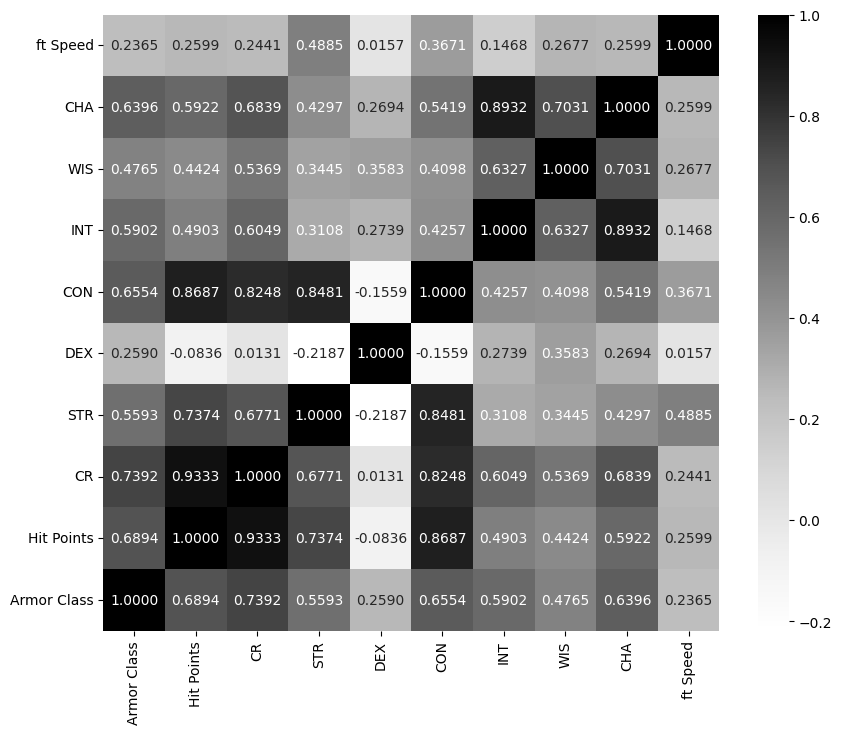

In [36]:
# Calcula a matriz de correlação
corr = monsters_drop.corr()

plt.figure(figsize=(10, 8))

# Cria o mapa de calor com Seaborn
sns.heatmap(corr, annot=True, fmt=".4f", cmap="Greys", cbar=True, square=True, 
            xticklabels=corr.columns, yticklabels=corr.columns)

# Inverte a ordem dos eixos Y
plt.gca().invert_yaxis()

plt.show()


### Teste de Esfericidade de Bartlett

In [37]:
bartlett, p_value = calculate_bartlett_sphericity(monsters_drop)

print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')

Qui² Bartlett: 4050.55
p-valor: 0.0


### Definindo a PCA (procedimento inicial com todos os fatores possíveis)

In [38]:
fa = FactorAnalyzer(n_factors=10, method='principal', rotation=None).fit(monsters_drop)

### Obtendo os eigenvalues (autovalores)

In [39]:
autovalores = fa.get_eigenvalues()[0]

print(autovalores)

[5.51621508 1.75406036 0.94730798 0.6372547  0.41270819 0.25817778
 0.22657358 0.10729393 0.08916758 0.05124082]


In [40]:
tabela_autovalores = pd.DataFrame(autovalores)

tabela_autovalores.columns = ["Autovalor"]
tabela_autovalores.index=[f"λ² {i+1}" for i,v in enumerate(tabela_autovalores.index)]

tabela_autovalores

,Autovalor
λ² 1,5.516215
λ² 2,1.754060
λ² 3,0.947308
λ² 4,0.637255
λ² 5,0.412708
λ² 6,0.258178
λ² 7,0.226574
λ² 8,0.107294
λ² 9,0.089168
λ² 10,0.051241


### Parametrizando a PCA para os fatores derivados de autovalores > 0.94

Eu escolhi por deixar o terceiro fator por este estar bem próximo de 1

In [41]:
fa = FactorAnalyzer(n_factors=3, method='principal', rotation=None).fit(monsters_drop)

### Eigenvalues, variâncias e variâncias acumuladas

In [42]:
autovalores_fatores = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
Fator 1   5.516215   0.551622             0.551622
Fator 2   1.754060   0.175406             0.727028
Fator 3   0.947308   0.094731             0.821758


### Gráfico que demonstra a diferença de variância acumulada dos fatores

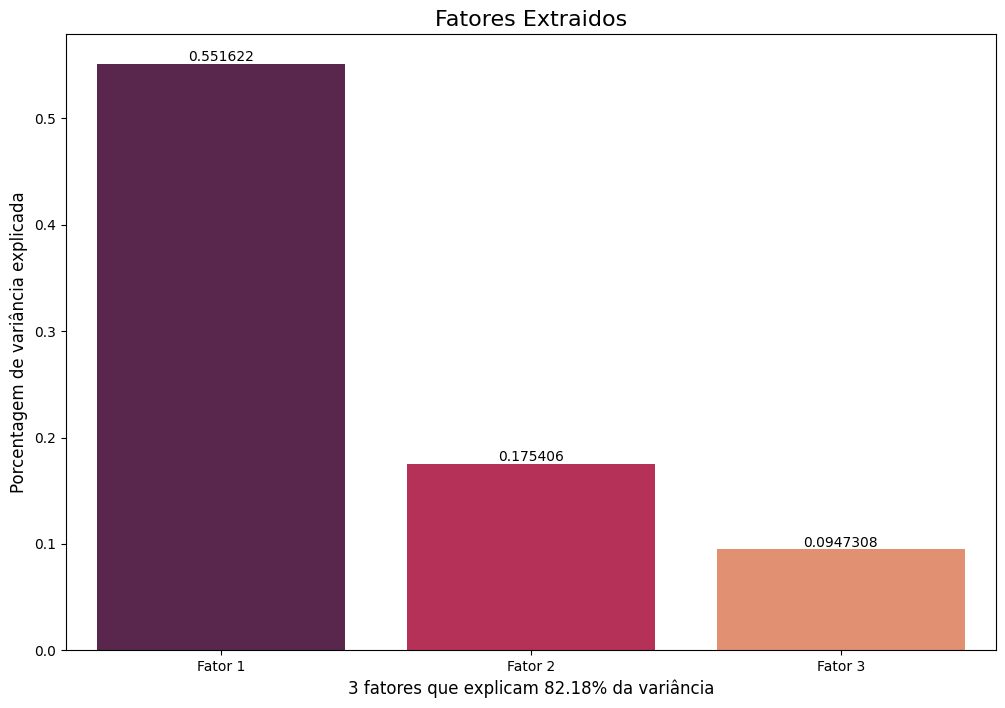

In [43]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=tabela_eigen.index, y=tabela_eigen['Variância'], hue=tabela_eigen.index, data=tabela_eigen, palette='rocket', legend=False)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Fatores Extraidos", fontsize=16)
plt.xlabel(f"{tabela_eigen.shape[0]} fatores que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=12)
plt.ylabel("Porcentagem de variância explicada", fontsize=12)
plt.show()

### Determinando as cargas fatoriais

In [44]:
cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = monsters_drop.columns

print(tabela_cargas)

              Fator 1   Fator 2   Fator 3
Armor Class  0.820055  0.108876 -0.094918
Hit Points   0.883665 -0.275720 -0.199816
CR           0.918091 -0.119059 -0.208473
STR          0.766232 -0.491996  0.160344
DEX          0.116784  0.804085  0.215764
CON          0.861539 -0.392854 -0.046938
INT          0.740831  0.467149 -0.129251
WIS          0.685537  0.443605  0.162548
CHA          0.831056  0.386702 -0.034488
ft Speed     0.409297 -0.210978  0.857979


### Gráfico das cargas fatoriais (loading plot) dos fatores 1 e 2

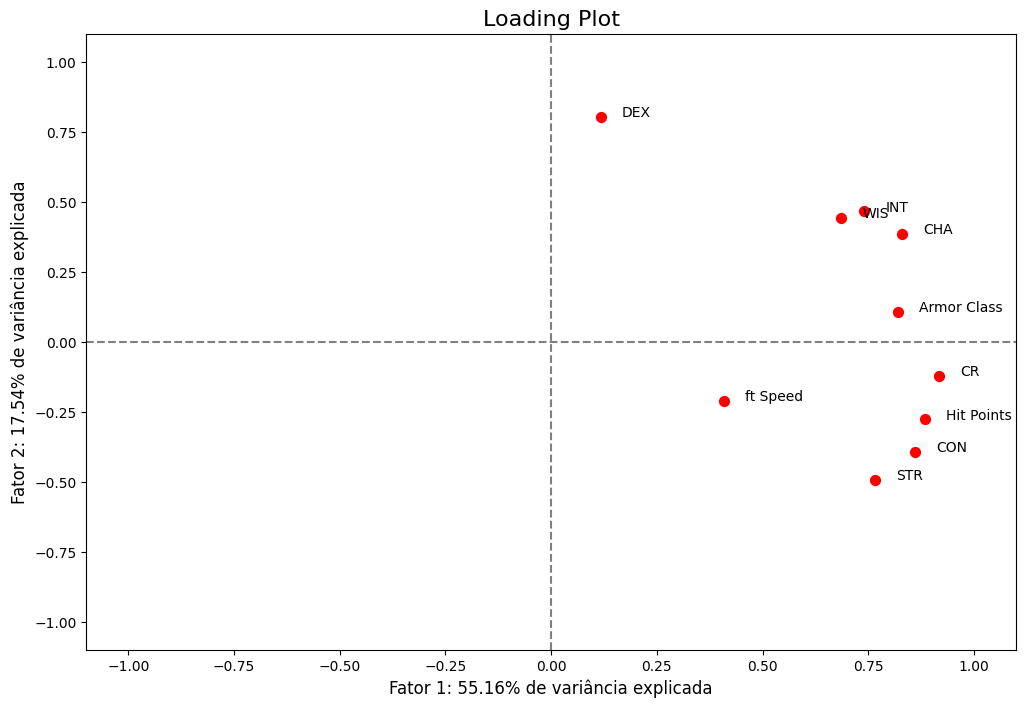

In [45]:
plt.figure(figsize=(12,8))
tabela_cargas_chart = tabela_cargas.reset_index()
plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=50, color='red')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='grey', ls='--')
plt.axvline(x=0, color='grey', ls='--')
plt.ylim([-1.1,1.1])
plt.xlim([-1.1,1.1])
plt.title("Loading Plot", fontsize=16)
plt.xlabel(f"Fator 1: {round(tabela_eigen.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.ylabel(f"Fator 2: {round(tabela_eigen.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.show()

### Determinando as comunalidades

In [46]:
comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = monsters_drop.columns

print(tabela_comunalidades)


             Comunalidades
Armor Class       0.693353
Hit Points        0.896813
CR                0.900527
STR               0.854882
DEX               0.706745
CON               0.898787
INT               0.783765
WIS               0.693167
CHA               0.841382
ft Speed          0.948163


### Extração dos fatores para as observações do banco de dados

In [47]:
fatores = pd.DataFrame(fa.transform(monsters_drop))
fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores.columns)]

# Adicionando os fatores ao banco de dados

monsters = pd.concat([monsters.reset_index(drop=True), fatores], axis=1)

monsters

,Name,Armor Class,Hit Points,Speed,CR,STR,DEX,CON,INT,WIS,CHA,Type,Alignment,ft Speed,Fator 1,Fator 2,Fator 3
0,Aarakocra,12,13,"20 ft., fly 50 ft.",0.25,10,14,10,11,12,11,Medium humanoid (Aarakocra),neutral good,20.0,-0.586455,1.041262,-0.297272
1,Aboleth,17,135,"10 ft., swim 40 ft.",10.00,21,9,15,18,15,18,Large aberration,lawful evil,10.0,0.968412,0.307838,-2.005800
2,Abominable Yeti,15,137,"40 ft., climb 40 ft.",9.00,24,10,22,9,13,9,Huge monstrosity,chaotic evil,40.0,0.796720,-1.317761,0.463842
3,Acolyte,10,9,30 ft.,0.25,10,10,10,10,14,11,Medium humanoid (any race),any alignment,30.0,-0.596224,0.451737,0.336964
4,Adult Black Dragon,19,195,"40 ft., fly 80 ft., swim 40 ft.",14.00,23,14,21,14,13,17,Huge dragon (Chromatic),chaotic evil,40.0,1.544992,-0.156672,0.106116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Young White Dragon,17,133,"40 ft., burrow 20 ft., fly 80 ft., swim 40 ft.",6.00,18,10,18,6,11,12,Large dragon (Chromatic),chaotic evil,40.0,0.444444,-0.963213,0.351444
424,Yuan-ti Abomination,15,127,40 ft.,7.00,19,16,17,17,15,18,"Large monstrosity (Shapechanger, Yuan-ti)",neutral evil,40.0,0.996861,0.998722,0.786974
425,Yuan-ti Malison,12,66,30 ft.,3.00,16,14,13,14,12,16,"Medium monstrosity (Shapechanger, Yuan-ti)",neutral evil,30.0,0.094091,0.748486,0.201323
426,Yuan-ti Pureblood,11,40,30 ft.,1.00,11,12,11,13,12,14,Medium humanoid (Yuan-ti),neutral evil,30.0,-0.331176,0.699069,0.154073


### Identificando os scores fatoriais

In [48]:
scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = monsters_drop.columns

print(tabela_scores)

              Fator 1   Fator 2   Fator 3
Armor Class  0.148663  0.062071 -0.100198
Hit Points   0.160194 -0.157190 -0.210930
CR           0.166435 -0.067876 -0.220069
STR          0.138905 -0.280490  0.169262
DEX          0.021171  0.458414  0.227765
CON          0.156183 -0.223968 -0.049549
INT          0.134301  0.266325 -0.136440
WIS          0.124277  0.252902  0.171589
CHA          0.150657  0.220461 -0.036407
ft Speed     0.074199 -0.120280  0.905702


### Criando um ranking (soma ponderada e ordenamento)

In [63]:
# O ranking irá considerar apenas os 3 fatores com autovalores > 1
# A base de seleção é a tabela_eigen

monsters['Ranking'] = 0

for index, item in enumerate(list(tabela_eigen.index)):
    variancia = tabela_eigen.loc[item]['Variância']

    monsters['Ranking'] = monsters['Ranking'] + monsters[tabela_eigen.index[index]]*variancia
    
monsters = monsters.sort_values(by="Ranking", ascending=False)

# Exibindo apenas o nome e o ranking dos monstros
print(monsters[["Name", "Ranking"]])

                    Name   Ranking
348                Solar  2.447861
126             Empyrean  2.281715
22   Ancient Gold Dragon  1.791464
300             Planetar  1.777719
24    Ancient Red Dragon  1.450895
..                   ...       ...
193            Gray Ooze -1.222857
145      Gelatinous Cube -1.268919
387        Violet Fungus -1.802964
343             Shrieker -1.862929
144            Gas Spore -1.991690

[428 rows x 2 columns]


### Copiando o dataset

In [64]:
monsters_ranking = monsters.copy()

In [67]:
valor_max_desejado = 100
# Função de Min-Max Scaling
def min_max_scaling(series, max_value):
    min_val = series.min()
    max_val = series.max()
    scaled_series = (series - min_val) / (max_val - min_val) * max_value
    return scaled_series

# Aplicando a normalização na coluna 'Ranking'
monsters_ranking['Ranking'] = min_max_scaling(monsters_ranking['Ranking'], valor_max_desejado)

# Ordenando o ranking
monsters_ranking = monsters_ranking.sort_values(by="Ranking", ascending = False)

# Resetando o Index
monsters_ranking = monsters_ranking.reset_index()

# Dropando os campos "Level 0" e o "Index"
monsters_ranking=monsters_ranking.drop(["level_0","index"],axis=1)

monsters_ranking

,Name,Armor Class,Hit Points,Speed,CR,STR,DEX,CON,INT,WIS,CHA,Type,Alignment,ft Speed,Fator 1,Fator 2,Fator 3,Ranking
0,Solar,21,243,"50 ft., fly 150 ft.",21.00,26,22,26,25,25,30,Large celestial,lawful good,50.0,3.419683,2.489564,1.317476,100.000000
1,Empyrean,22,313,"50 ft., fly 50 ft., swim 50 ft.",23.00,30,21,30,21,22,27,Huge celestial (Titan),chaotic good (75 %) or neutral evil (25 %),50.0,3.566510,1.264764,0.976491,96.257586
2,Ancient Gold Dragon,22,546,"40 ft., fly 80 ft., swim 40 ft.",24.00,30,14,29,18,17,28,Gargantuan dragon (Metallic),lawful good,40.0,3.604924,-0.564732,-1.034850,85.214792
3,Planetar,19,200,"40 ft., fly 120 ft.",16.00,24,20,24,19,22,25,Large celestial,lawful good,40.0,2.504549,1.828799,0.795661,84.905184
4,Ancient Red Dragon,22,546,"40 ft., climb 40 ft., fly 80 ft.",24.00,30,10,29,18,15,23,Gargantuan dragon (Chromatic),chaotic evil,40.0,3.356837,-1.523290,-1.410463,77.543541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Gray Ooze,8,22,"10 ft., climb 10 ft.",0.50,12,6,16,1,6,2,Medium ooze,unaligned,10.0,-1.348551,-1.891080,-1.554519,17.317792
424,Gelatinous Cube,6,84,15 ft.,2.00,14,3,20,1,6,1,Large ooze,unaligned,15.0,-1.120996,-2.876132,-1.541871,16.280257
425,Violet Fungus,5,18,5 ft.,0.25,3,1,10,1,3,1,Medium plant,unaligned,5.0,-2.133148,-2.220547,-2.499458,4.251017
426,Shrieker,5,13,0 ft.,0.00,1,1,10,1,3,1,Medium plant,unaligned,0.0,-2.222017,-2.073778,-2.886742,2.900303


### Tirando algumas variáveis para ter meu dataset final

In [69]:
monsters_ranking_drop=monsters_ranking.drop(["Speed","Type","Alignment"],axis=1)
monsters_ranking

,Name,Armor Class,Hit Points,Speed,CR,STR,DEX,CON,INT,WIS,CHA,Type,Alignment,ft Speed,Fator 1,Fator 2,Fator 3,Ranking
0,Solar,21,243,"50 ft., fly 150 ft.",21.00,26,22,26,25,25,30,Large celestial,lawful good,50.0,3.419683,2.489564,1.317476,100.000000
1,Empyrean,22,313,"50 ft., fly 50 ft., swim 50 ft.",23.00,30,21,30,21,22,27,Huge celestial (Titan),chaotic good (75 %) or neutral evil (25 %),50.0,3.566510,1.264764,0.976491,96.257586
2,Ancient Gold Dragon,22,546,"40 ft., fly 80 ft., swim 40 ft.",24.00,30,14,29,18,17,28,Gargantuan dragon (Metallic),lawful good,40.0,3.604924,-0.564732,-1.034850,85.214792
3,Planetar,19,200,"40 ft., fly 120 ft.",16.00,24,20,24,19,22,25,Large celestial,lawful good,40.0,2.504549,1.828799,0.795661,84.905184
4,Ancient Red Dragon,22,546,"40 ft., climb 40 ft., fly 80 ft.",24.00,30,10,29,18,15,23,Gargantuan dragon (Chromatic),chaotic evil,40.0,3.356837,-1.523290,-1.410463,77.543541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Gray Ooze,8,22,"10 ft., climb 10 ft.",0.50,12,6,16,1,6,2,Medium ooze,unaligned,10.0,-1.348551,-1.891080,-1.554519,17.317792
424,Gelatinous Cube,6,84,15 ft.,2.00,14,3,20,1,6,1,Large ooze,unaligned,15.0,-1.120996,-2.876132,-1.541871,16.280257
425,Violet Fungus,5,18,5 ft.,0.25,3,1,10,1,3,1,Medium plant,unaligned,5.0,-2.133148,-2.220547,-2.499458,4.251017
426,Shrieker,5,13,0 ft.,0.00,1,1,10,1,3,1,Medium plant,unaligned,0.0,-2.222017,-2.073778,-2.886742,2.900303
